<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/EMD_EEMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Giới thiệu về Phương pháp phân tách tín hiệu thực ngiệm (Emperical Mode Decomposition)
1. Giới thiệu
link:https://www.mql5.com/en/articles/439
Trong bài viết này, chúng ta sẽ cùng tìm hiểu về ứng dụng của phương pháp EMD trong việc tách tín hiệu từ chuỗi thời gian cho trước. 

Khác với phương pháp lọc dùng Fourier Transform, đòi hỏi tín hiệu có giả thiết tần số xác định. EMD phù hợp với các tín hiệu không có tần số cố định (nonstationary). 
Phương pháp này tương tự như Wavelet Transform trong việc phân tách tín hiệu thành các giải tín hiệu xấp xỉ (approxiamations) và tín hiệu chi tiết (details). Nhưng điểm khác biệt là phương pháp tương tác lên tín hiệu nguồn trực tiếp mà không cần qua các phép tín toán chập cố định từ các hàm wavelets mẫu nào đó thiết lập trước.

2. Cách thực hiện như sau:
EMD tách một chuỗi dữ liệu thành các tín hiệu cơ sở (intrinsic mode function (IMF)). Các tín hiệu cơ sở được sinh ra từ dữ liệu đầu vào. Mỗi IMF thỏa hai điều kiện sau:
* Số điểm cực của một tín hiệu cơ sở (số lượng điểm cực đại và cực tiểu) và số điểm cắt trục không bằng hoặc sai khác nhiều nhất là một.
* Ở bất cứ vị trí điểm nào trên tín hiệu cơ sở, giá trị trung bình của đường bao (envelope) xác định bởi cá điểm cực đại và đường bao các điểm cực tiểu là bằng không.

Một tín hiệu IMF có thể có tần số và biên đô không cố định.

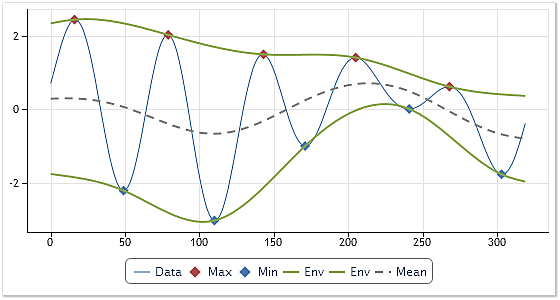

Ví dụ một phân tách tín hiệu với EMD 

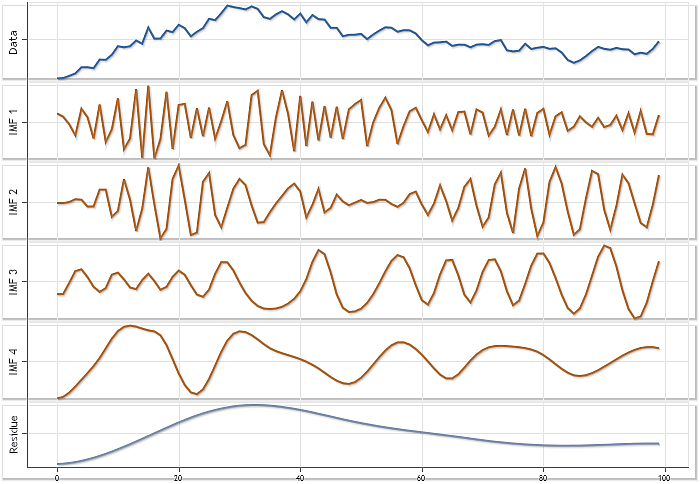


3. EEMD (Ensemble EMD)



---

##Sử dụng thư viện PyEMD trong Python

### Nhập dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt


ppg = pd.read_csv('drive/MyDrive/Dataset/Packs/longcun02.csv', header=0)

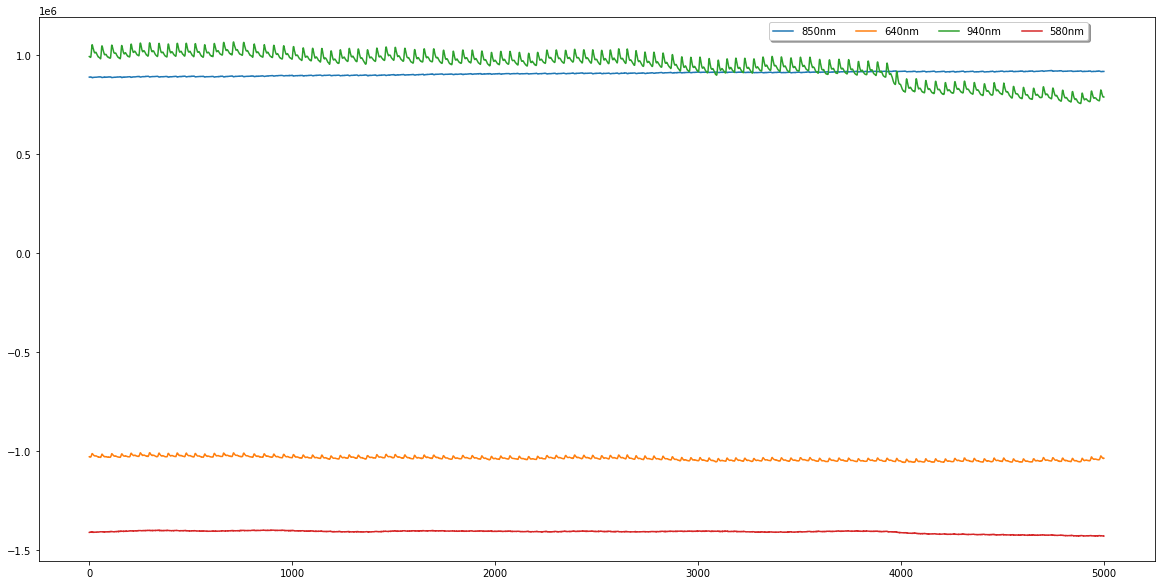

In [ ]:
#plt.subplots(figsize=(20,10))
labels = ppg.columns.values
ppg[0:5000].plot(figsize=(20,10), label=labels)
plt.legend(loc='upper left', bbox_to_anchor=(0.65, 1.00), shadow=True, ncol=4)
#plt.legend()



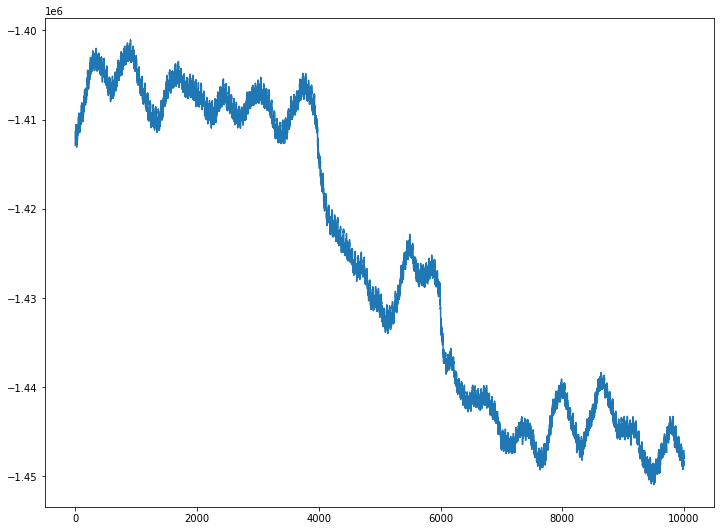

In [ ]:
ppg['580nm'][0:10000].plot(figsize=(12,9), label=labels[0])

In [ ]:
from sklearn.preprocessing import minmax_scale
#Wavelet Decompsition
# take the number data in even length
#data  = minmax_scale(ppg['940nm'][0:np.size(ppg['940nm'])//2*2])
# function calculate length of data in power of 2 and larger > 1023 point
#name = '580nm'
name = '940nm'
M = np.size(ppg[name])
n = np.floor(np.log2(M))
N = int(2**n)
res = M - N
while res > 1023:
  n = np.floor(np.log2(res))
  N = N + int(2**n)
  res = M - N

data  = ppg[name][0:N] - np.mean(ppg[name][0:N])
data  = minmax_scale(ppg[name][0:N])

### Cài đặt gói pyEMD

In [ ]:
!pip install EMD-signal

### EMD example

In [ ]:
from PyEMD import EMD

#s = np.random.random(100)
#t = np.linspace(0, 1, 200)
#s = np.cos(11*2*np.pi*t*t) + 6*t*t 
s = data[0:2100]
emd = EMD()
IMFs = emd.emd(s)

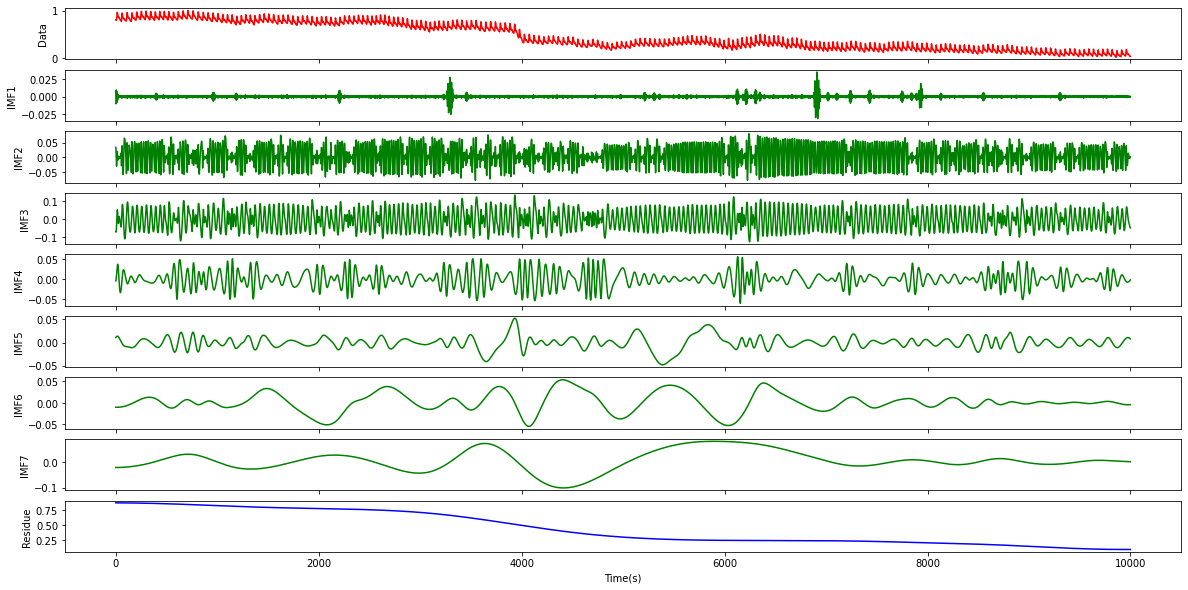

In [ ]:
N = IMFs.shape[0]
fig,axs = plt.subplots(N+1,1,figsize=(20,10))


L1, L2 = 0, len(s)
# range of x after convert to sampling rate at 70
x = [i/70 for i in range(L1,L2)]


n = [i for i in range(0,N+1)]
#labels = ['s','d1','d2','d3','d4','d5','d6','d7', 'a7']
for ax,i in zip(axs,n):
  

  if i==N:
     ax.plot(IMFs[N-1][L1:L2],'b')
     ax.set_xlabel('Time(s)')
     ax.set_ylabel('Residue') 
     #ax.xaxis.set_ticklabels(xlabel)
  elif i==0:
    ax.plot(s[L1:L2],'r')
    ax.set_ylabel('Data')
    #ax.xaxis.set_ticklabels([])
  else:
    ax.plot(IMFs[i-1][L1:L2],'g')
    ax.set_ylabel('IMF'+str(i))
  ax.label_outer()
  #ax.yaxis.tick_right()
  #ax.yaxis.Exponent = 5

In [ ]:
from PyEMD import Visualisation

t = np.arange(0, 3, 0.01)
S = np.sin(13*t + 0.2*t**1.4) - np.cos(3*t)

# Extract imfs and residue
# In case of EMD
emd = EMD()
emd.emd(S)
imfs, res = emd.get_imfs_and_residue()
extremas = emd.find_extrema()
# In general:
#components = EEMD()(S)
#imfs, res = components[:-1], components[-1]

vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, t=t, include_residue=True)
vis.plot_instant_freq(t, imfs=imfs)
vis.show()

### EEMD example

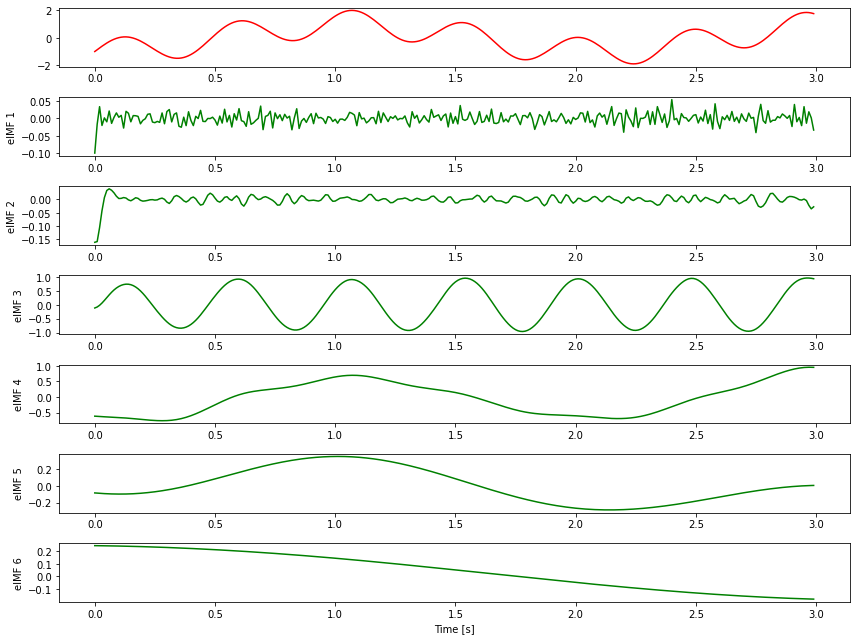

In [ ]:
from PyEMD import EEMD
eemd = EEMD()

# Using parabolic method to detect extrema
emd = eemd.EMD
emd.extrema_detection='parabol'

# Execute EEMD on S
eIMFs = eemd.eemd(S, t)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

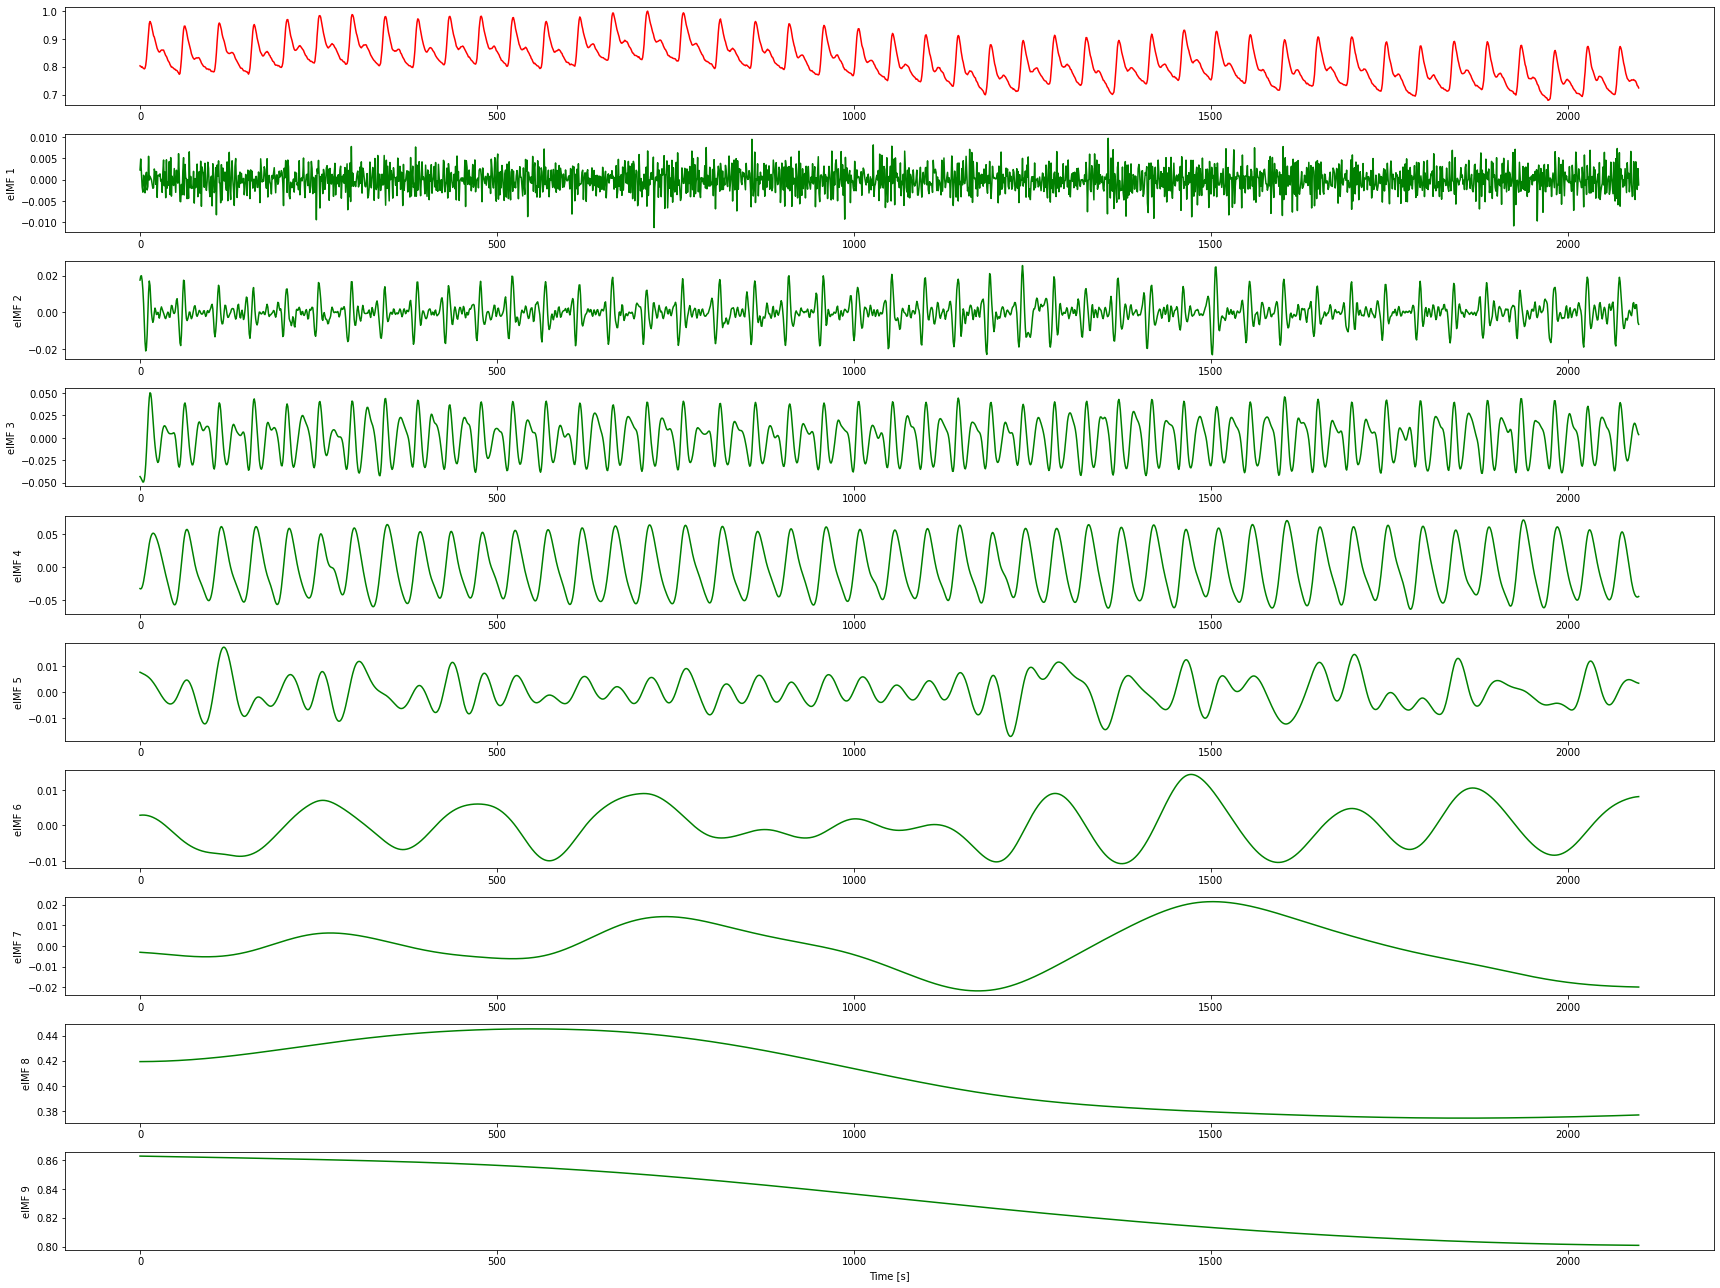

In [ ]:
from PyEMD import EEMD
#eemd = EEMD(spline_kind='akima', trials=20, max_imfs=5)
#eemd = EEMD(spline_kind='linear', trials=20, max_imfs=5)
eemd = EEMD(spline_kind='cubic', trials=20, max_imfs=5)

# Using parabolic method to detect extrema
emd = eemd.EMD
emd.extrema_detection='parabol'

# Execute EEMD on S

eIMFs = eemd.eemd(s)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(24,18))
plt.subplot(nIMFs+1, 1, 1)
plt.plot( s, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

###Biến đổi sang miền tần số với Fourier Transform

In [ ]:
from scipy import pi
from scipy.fftpack import fft

In [ ]:
sample_rate = 70
N = (30 - 0) * sample_rate

In [ ]:
N

2100

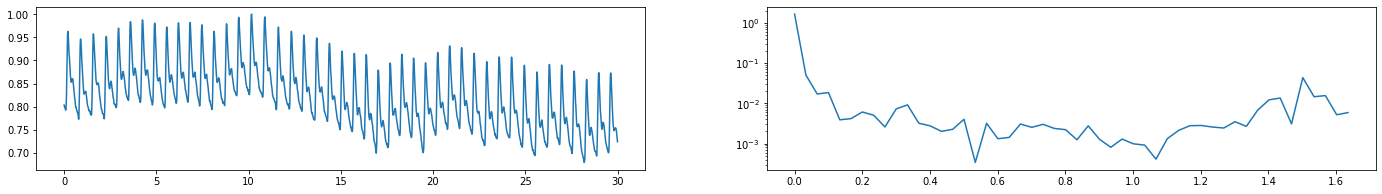

In [ ]:
plt.figure(figsize=(24,3))

t = np.linspace(0, 30, N)
plt.subplot(1,2,1)
plt.plot (t,s)

fft_s = fft(s)
fre = np.linspace (0.0, int(sample_rate/2), int (N/2))
y = 2/N*np.abs(fft_s[0:np.int(N/2)])
plt.subplot(1,2,2)
L1, L2= 0, 50
plt.plot (fre[L1:L2],y[L1:L2])
plt.yscale('log')

In [ ]:
y

array([1.64272897e+00, 5.06486315e-02, 1.70718925e-02, ...,
       3.59800065e-05, 8.66901174e-05, 6.02346825e-05])

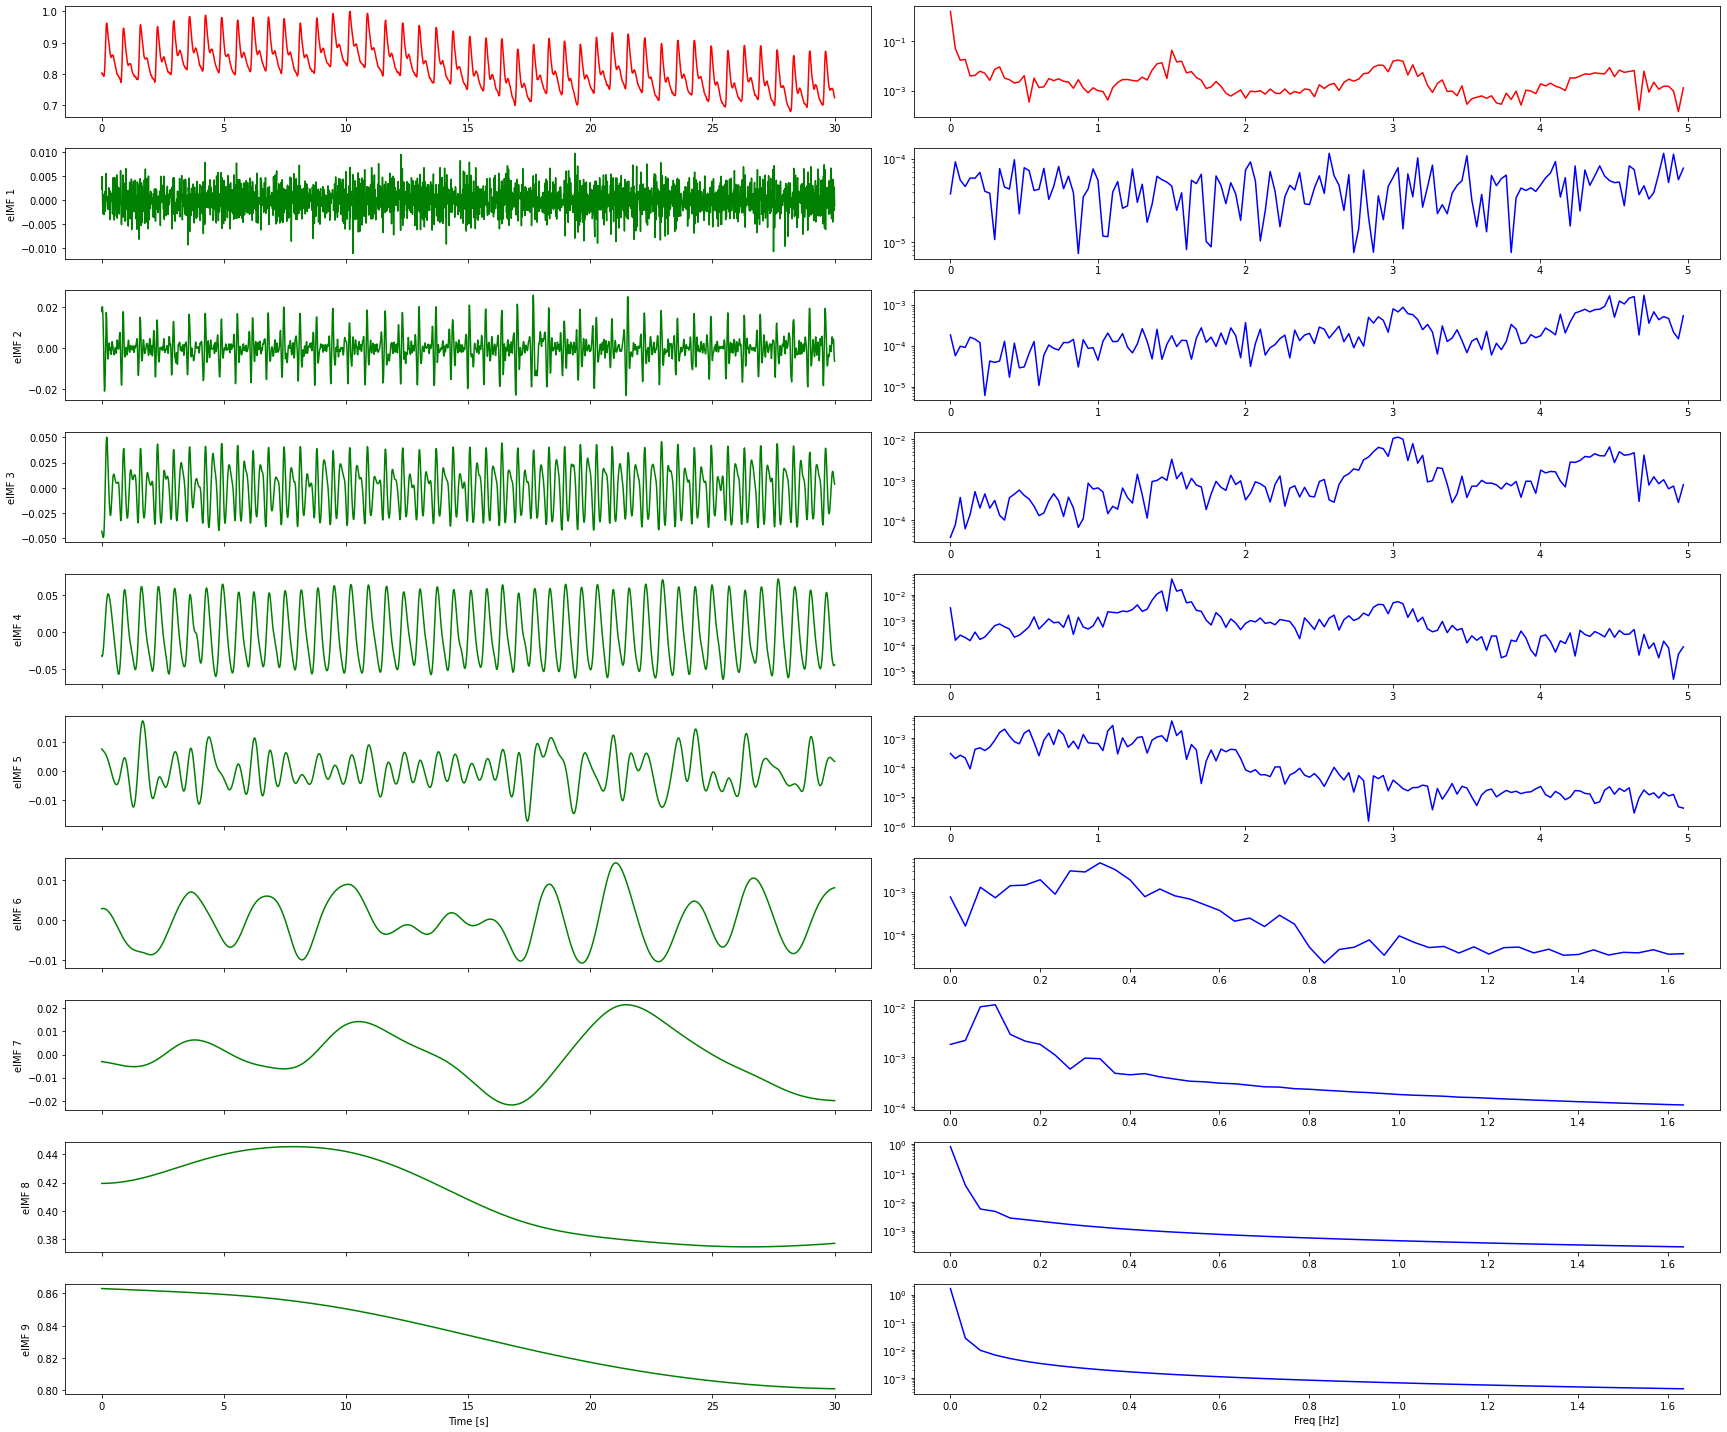

In [ ]:
sampel_rate = 70
N = (30-0)*sampel_rate
fre = np.linspace (0.0, int(sample_rate/2), int (N/2))
t = np.linspace(0, 30, N)

# Plot results
#N = IMFs.shape[0]
fig,axs = plt.subplots(nIMFs+1,2,figsize=(24,20))
axs[0][0].plot(t, s, 'r')

L1, L2= 0, 150
fft_s = fft(s)
y = 2/N*np.abs(fft_s[0:np.int(N/2)])
axs[0][1].semilogy(fre[L1:L2], y[L1:L2], 'r')


for n in range(nIMFs):
    axs[n + 1][0].plot(t, eIMFs[n], 'g')
    axs[n + 1][0].set_ylabel("eIMF %i" %(n+1))
    axs[n+1][0].label_outer()

    fft_s = fft(eIMFs[n])
    y = 2/N*np.abs(fft_s[0:np.int(N/2)])
    L1, L2= 0, 150 if n < 5 else 50 #len(fre)
    axs[n + 1][1].semilogy(fre[L1:L2],y[L1:L2],'b') # draw with y in log scale
    #axs[n+1][1].label_outer()

axs[nIMFs][0].set_xlabel("Time [s]")
axs[nIMFs][1].set_xlabel("Freq [Hz]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()


9